## Import Libraries

In [23]:

#libs for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit, cross_validate

## Read CSV

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


 Make an EDA

In [3]:
# List all the columns
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Heatmap for NULL values

<AxesSubplot:>

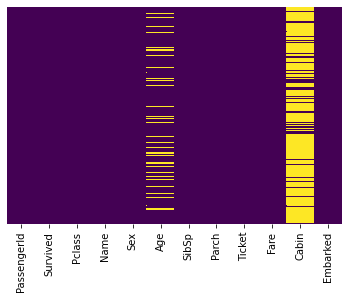

In [5]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Passenger Class vs Age

Number of passengers Survived

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

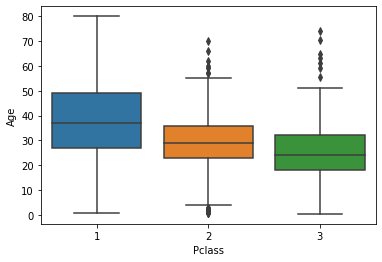

In [6]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

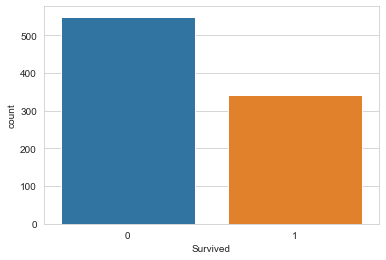

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

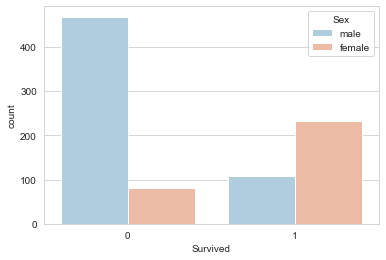

In [8]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')

In [9]:
sns.countplot(train_data.Pclass)
plt.show()


NameError: name 'train_data' is not defined

Number of passengers Survived based on Passenger Class

<AxesSubplot:xlabel='Survived', ylabel='count'>

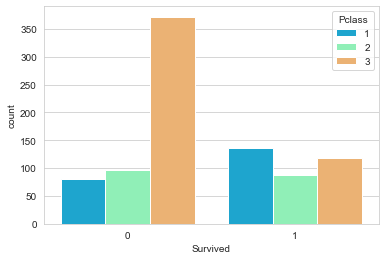

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

Number of siblings / spouses aboard the Titanic

<AxesSubplot:xlabel='SibSp', ylabel='count'>

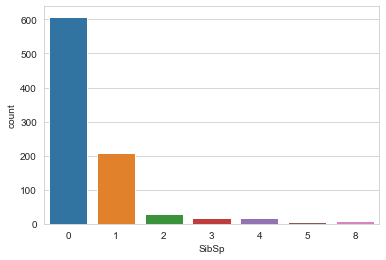

In [11]:
sns.countplot(x='SibSp',data=df_train)

Frequency of passengers group by Age

<AxesSubplot:ylabel='Frequency'>

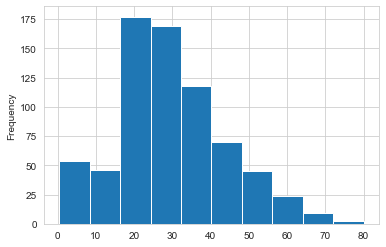

In [12]:
df_train['Age'].plot.hist()

Frequency of passengers group by Fare

<AxesSubplot:ylabel='Frequency'>

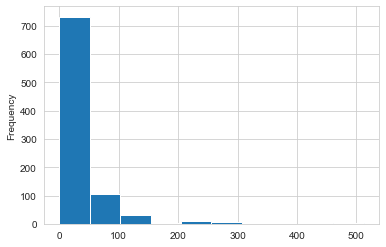

In [13]:
df_train['Fare'].plot.hist()

In [14]:
corrmat = df_train.corr()
corrmat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

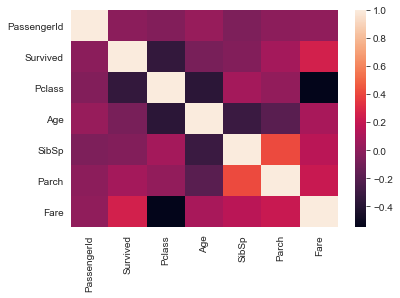

In [15]:
sns.heatmap(corrmat)

In [28]:
df_train['Age'].fillna(df_train['Age'].mode()[0], inplace=True)
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0], inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

 Preprocess the data with the function « ColumnTransformer».

In [29]:
# on définit les colonnes et les transformations pour 
# les colonnes quantitatives
label = ['Survived']
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

X_train = df_train[numeric_features + categorical_features]
y_train = df_train[label]

X_test = df_test[numeric_features + categorical_features]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
])
col_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Embarked']),
        ('ordinal', OrdinalEncoder(), ['Sex'])
    ],
    remainder='passthrough'                                 
)
categorical_transformer = Pipeline(steps=[
    ('col', col_transformer)
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression())
])

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
validation_results = cross_validate(model, X_train, y_train, cv=sss, return_estimator=True)
estimators, test_scores = validation_results['estimator'], validation_results['test_score']

test_scores
print(f"mean accuracy: {np.mean(test_scores)}")



    


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*

mean accuracy: 0.7955156950672645


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
